**Artamonov Kirill, B01-007**

# Task X.9.4

**Сингулярно-возмущенная система — модель двухлампового генератора Фрюгауфа**

$\varepsilon \dot x_1 = -\alpha(y_1-y_2) + \varphi(x_1) - x_2$

$\varepsilon \dot x_2 = -\alpha(y_1-y_2) + \varphi(x_2) - x_1$

$\dot y_1 = x_1$

$\dot y_2 = x_2$


$\alpha > 0$, $\varphi(u) = -\tan (\pi u / 2)$

$x_1(0) = x_2(0) = 0$

$y_1 = 2, y_2 = 0$

$T_k = 20$

$\varepsilon = 10^{-3}, 10^{-6}$


Importing libriaries:

In [59]:
import numpy as np
import matplotlib.pyplot as plt

Defining a system:

In [68]:
epsilon = 1e-3
def f(t, y):
    alpha = 1
    phi = lambda u: -np.tan(np.pi * u / 2)
    
    x1, x2, y1, y2 = y
    
    dx1_dt = -alpha * (y1 - y2) + phi(x1) - x2
    dx2_dt = -alpha * (y1 - y2) + phi(x2) - x1
    dy1_dt = x1
    dy2_dt = x2
    
    return np.array([dx1_dt, dx2_dt, dy1_dt, dy2_dt])

## **Rosenbrock Method(n = 2):**

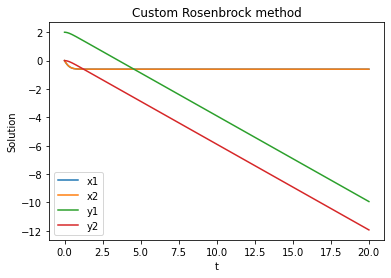

In [74]:
def rosenbrock(f, t_span, y0, h, epsilon, max_iter=100):
    a = np.array([[1/4, 1/4-np.sqrt(3)/6], [1/4+np.sqrt(3)/6, 1/4]])
    c = np.array([1/2, 1/2])
    b = np.array([1/2, 1/2])
    
    t = np.arange(t_span[0], t_span[1]+h, h)
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    
    for i in range(1, len(t)):
        k = np.zeros((2, len(y0)))
        for j in range(max_iter):
            for s in range(2):
                k[s] = f(t[i-1] + c[s]*h, y[i-1] + h*(a[s][0]*k[0] + a[s][1]*k[1]))
            y_pred = y[i-1] + h*(b[0]*k[0] + b[1]*k[1])
            if np.allclose(y_pred, y[i-1] + h*(b[0]*k[0] + b[1]*k[1]), rtol=epsilon, atol=1e-6):
                break
        y[i] = y_pred
        
    return t, y

y0 = np.array([0, 0, 2, 0])
t_span = (0, 20)
h = 0.01

t, y = rosenbrock(f, t_span, y0, h, epsilon)

plt.plot(t, y[:, 0], label='x1')
plt.plot(t, y[:, 1], label='x2')
plt.plot(t, y[:, 2], label='y1')
plt.plot(t, y[:, 3], label='y2')
plt.legend()
plt.xlabel('t')
plt.ylabel('Solution')
plt.title('Custom Rosenbrock method')
plt.show()

Checking the solution using library rosenbrock method:

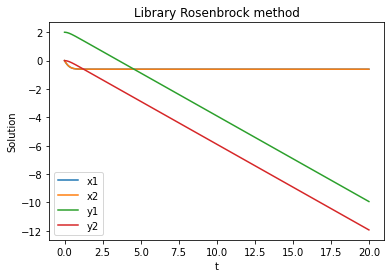

In [75]:
from scipy.integrate import ode

y0 = np.array([0, 0, 2, 0])
t_span = (0, 20)

# Use the Rosenbrock method to solve the system using the ode function.
solver = ode(f).set_integrator('rosenbrock', rtol=1e-4, atol=1e-6)
solver.set_initial_value(y0, t_span[0])

t_eval = np.linspace(t_span[0], t_span[1], 1000)
sol = np.zeros((len(t_eval), len(y0)))
sol[0] = y0

for i in range(1, len(t_eval)):
    solver.integrate(t_eval[i])
    sol[i] = solver.y

plt.plot(t_eval, sol[:, 0], label='x1')
plt.plot(t_eval, sol[:, 1], label='x2')
plt.plot(t_eval, sol[:, 2], label='y1')
plt.plot(t_eval, sol[:, 3], label='y2')
plt.legend()
plt.xlabel('t')
plt.ylabel('Solution')
plt.title('Library Rosenbrock method')
plt.show()
